In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/SkinCancerMNIST/SkinCancer_images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/SkinCancerMNIST/SkinCancer_masks.npy')

In [3]:
images.shape

(12311, 512, 512, 1)

In [4]:
images.nbytes

12909019136

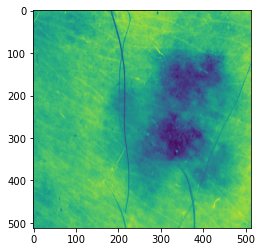

In [5]:
imshow(images[1])

In [7]:
masks.shape

(12311, 512, 512, 1)

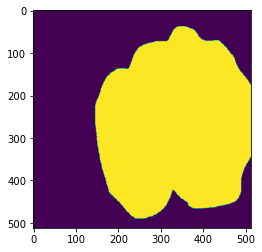

In [6]:
imshow(masks[1])

In [7]:
masks[1001].max()

True

In [8]:
import sys
sys.path.append('../')
import gp2

In [10]:
from tensorflow.keras.callbacks import Callback
import matplotlib.pyplot as plt
import numpy as np

class VisualizeMaskCallback(Callback):
    def __init__(self, validation_data, index=0):
        self.validation_data = validation_data

    def on_epoch_end(self, epoch, logs=None):
        if logs is None:
            logs = {}
        # Select the first image and mask from the validation set
        x_val, y_val = self.validation_data[0][index], self.validation_data[1][index]

        # Predict the mask for the first image in the validation set
        y_pred = self.model.predict(x_val[np.newaxis, ...])[index]

        # Draw the input image, true mask, and predicted mask
        fig, ax = plt.subplots(nrows=1, ncols=3)

        ax[0].imshow(x_val)
        ax[0].title.set_text('Input Image')

        ax[1].imshow(y_val.squeeze(), cmap='gray')
        ax[1].title.set_text('True Mask')

        ax[2].imshow(y_pred.squeeze(), cmap='gray')
        ax[2].title.set_text('Predicted Mask')

        plt.show()

In [12]:
vis_callback = VisualizeMaskCallback(validation_data=(images, masks), index=2)

In [15]:
from keras import losses

In [16]:
loss_fx = losses.hinge

In [17]:
C = gp2.KUC_UNet2D(loss=loss_fx)

AttributeError: module 'gp2' has no attribute 'KUC_UNet2D'

Epoch 1/100
63/63 [==============================] - 39s 468ms/step - loss: 0.4425 - dice_coeff: 0.5287 - val_loss: 11.6083 - val_dice_coeff: 0.4374


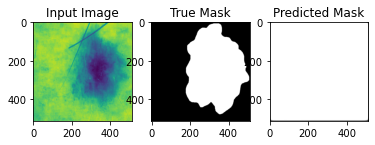

Epoch 2/100
63/63 [==============================] - 25s 400ms/step - loss: 0.3715 - dice_coeff: 0.5773 - val_loss: 14.2999 - val_dice_coeff: 0.4391


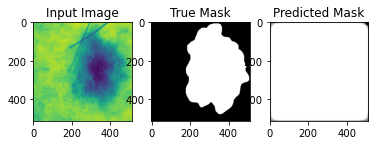

Epoch 3/100
63/63 [==============================] - 25s 399ms/step - loss: 0.3495 - dice_coeff: 0.6012 - val_loss: 8.9098 - val_dice_coeff: 0.4374


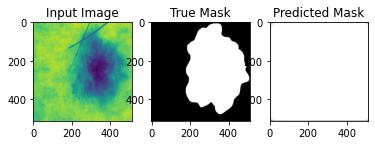

Epoch 4/100
63/63 [==============================] - 25s 399ms/step - loss: 0.3230 - dice_coeff: 0.6428 - val_loss: 0.9822 - val_dice_coeff: 0.0621


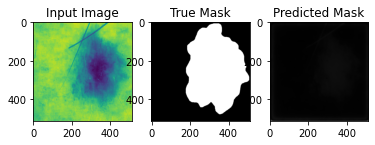

Epoch 5/100
63/63 [==============================] - 25s 402ms/step - loss: 0.3144 - dice_coeff: 0.6510 - val_loss: 1.0400 - val_dice_coeff: 0.0524


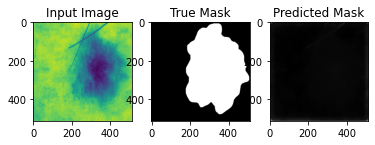

Epoch 6/100
63/63 [==============================] - 25s 401ms/step - loss: 0.3159 - dice_coeff: 0.6499 - val_loss: 3.6953 - val_dice_coeff: 0.4571


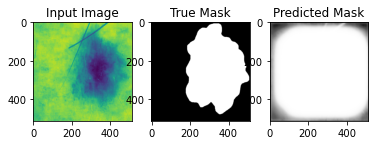

Epoch 7/100
63/63 [==============================] - 25s 401ms/step - loss: 0.3074 - dice_coeff: 0.6628 - val_loss: 0.4631 - val_dice_coeff: 0.6099


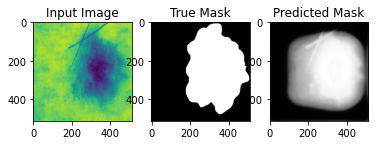

Epoch 8/100
63/63 [==============================] - 25s 402ms/step - loss: 0.3000 - dice_coeff: 0.6736 - val_loss: 3.2895 - val_dice_coeff: 0.5001


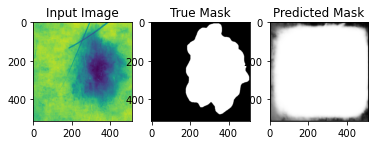

Epoch 9/100
63/63 [==============================] - 25s 401ms/step - loss: 0.2951 - dice_coeff: 0.6717 - val_loss: 1.1292 - val_dice_coeff: 0.5515


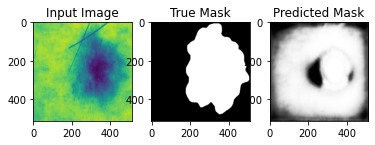

Epoch 10/100
63/63 [==============================] - 25s 401ms/step - loss: 0.2910 - dice_coeff: 0.6850 - val_loss: 0.3283 - val_dice_coeff: 0.7426


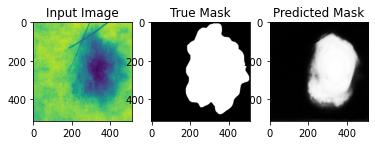

Epoch 11/100
63/63 [==============================] - 25s 402ms/step - loss: 0.2834 - dice_coeff: 0.6895 - val_loss: 0.9752 - val_dice_coeff: 0.4740


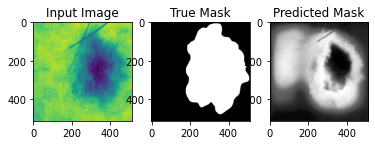

Epoch 12/100
63/63 [==============================] - 25s 400ms/step - loss: 0.2772 - dice_coeff: 0.6946 - val_loss: 1.0778 - val_dice_coeff: 0.5846


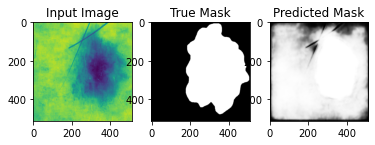

Epoch 13/100
63/63 [==============================] - 25s 402ms/step - loss: 0.2799 - dice_coeff: 0.6938 - val_loss: 0.3946 - val_dice_coeff: 0.6310


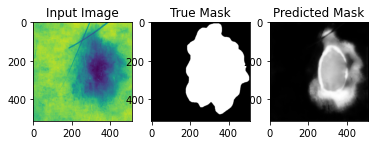

Epoch 14/100
63/63 [==============================] - 25s 401ms/step - loss: 0.2700 - dice_coeff: 0.7056 - val_loss: 0.4347 - val_dice_coeff: 0.6454


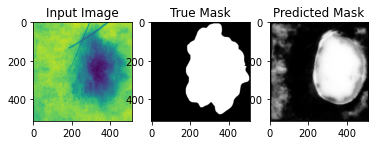

Epoch 15/100
63/63 [==============================] - 25s 401ms/step - loss: 0.2672 - dice_coeff: 0.7065 - val_loss: 0.6300 - val_dice_coeff: 0.7140


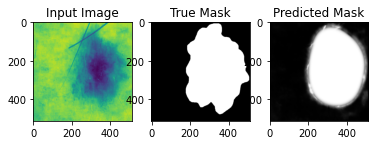

Epoch 16/100
63/63 [==============================] - 25s 401ms/step - loss: 0.2620 - dice_coeff: 0.7176 - val_loss: 1.6040 - val_dice_coeff: 0.5335


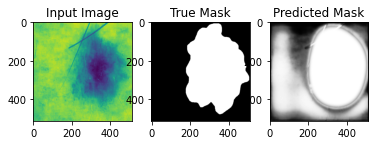

Epoch 17/100
63/63 [==============================] - 25s 401ms/step - loss: 0.2594 - dice_coeff: 0.7181 - val_loss: 0.3345 - val_dice_coeff: 0.7116


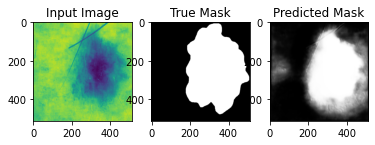

Epoch 18/100
63/63 [==============================] - 25s 401ms/step - loss: 0.2508 - dice_coeff: 0.7231 - val_loss: 0.5776 - val_dice_coeff: 0.6941


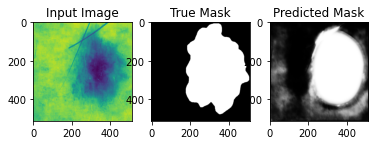

Epoch 19/100
63/63 [==============================] - 25s 400ms/step - loss: 0.2548 - dice_coeff: 0.7280 - val_loss: 0.8275 - val_dice_coeff: 0.5445


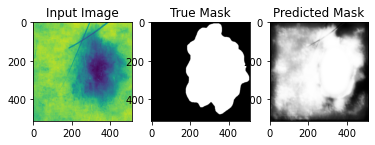

Epoch 20/100
63/63 [==============================] - 25s 401ms/step - loss: 0.2533 - dice_coeff: 0.7283 - val_loss: 0.3926 - val_dice_coeff: 0.6307


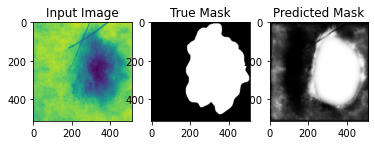

Epoch 21/100
63/63 [==============================] - 25s 401ms/step - loss: 0.2532 - dice_coeff: 0.7241 - val_loss: 0.7264 - val_dice_coeff: 0.4264


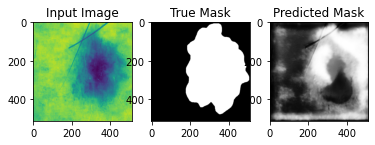

Epoch 22/100
63/63 [==============================] - 25s 400ms/step - loss: 0.2438 - dice_coeff: 0.7351 - val_loss: 1.3316 - val_dice_coeff: 0.4970


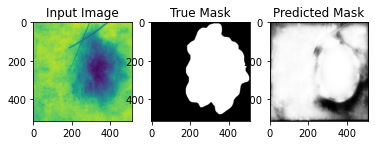

Epoch 23/100
63/63 [==============================] - 25s 401ms/step - loss: 0.2525 - dice_coeff: 0.7251 - val_loss: 0.4177 - val_dice_coeff: 0.6483


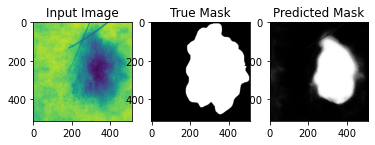

Epoch 24/100
63/63 [==============================] - 25s 403ms/step - loss: 0.2397 - dice_coeff: 0.7374 - val_loss: 0.5012 - val_dice_coeff: 0.6399


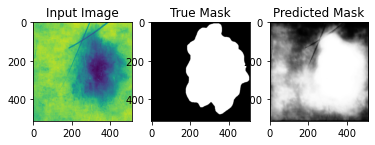

Epoch 25/100
63/63 [==============================] - 25s 401ms/step - loss: 0.2266 - dice_coeff: 0.7551 - val_loss: 0.3571 - val_dice_coeff: 0.6581


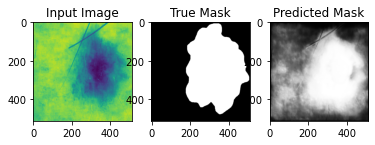

Epoch 26/100
63/63 [==============================] - 25s 402ms/step - loss: 0.2384 - dice_coeff: 0.7366 - val_loss: 1.1406 - val_dice_coeff: 0.5523


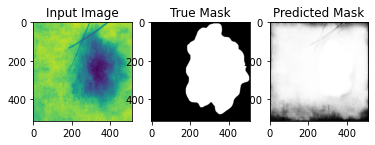

Epoch 27/100
63/63 [==============================] - 25s 402ms/step - loss: 0.2327 - dice_coeff: 0.7480 - val_loss: 0.5357 - val_dice_coeff: 0.6273


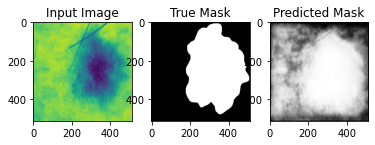

Epoch 28/100
63/63 [==============================] - 25s 400ms/step - loss: 0.2236 - dice_coeff: 0.7575 - val_loss: 2.1842 - val_dice_coeff: 0.4171


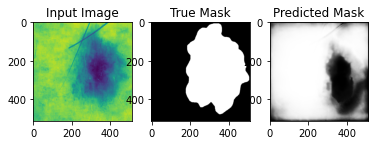

Epoch 29/100
63/63 [==============================] - 25s 401ms/step - loss: 0.2267 - dice_coeff: 0.7542 - val_loss: 0.3479 - val_dice_coeff: 0.6937


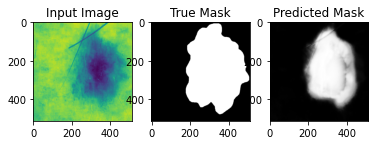

Epoch 30/100
63/63 [==============================] - 25s 403ms/step - loss: 0.2283 - dice_coeff: 0.7507 - val_loss: 0.2986 - val_dice_coeff: 0.7094


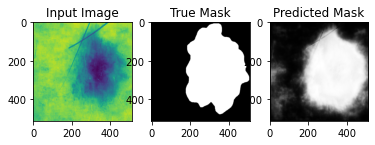

Epoch 31/100
63/63 [==============================] - 25s 401ms/step - loss: 0.2199 - dice_coeff: 0.7589 - val_loss: 1.5561 - val_dice_coeff: 0.5017


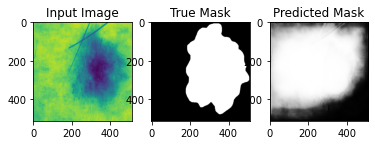

Epoch 32/100
63/63 [==============================] - 25s 401ms/step - loss: 0.2180 - dice_coeff: 0.7631 - val_loss: 0.4330 - val_dice_coeff: 0.6722


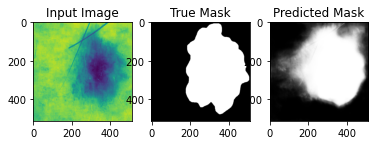

Epoch 33/100
63/63 [==============================] - 25s 403ms/step - loss: 0.2221 - dice_coeff: 0.7579 - val_loss: 1.8038 - val_dice_coeff: 0.5469


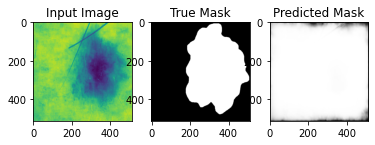

Epoch 34/100
63/63 [==============================] - 25s 401ms/step - loss: 0.2157 - dice_coeff: 0.7626 - val_loss: 1.9031 - val_dice_coeff: 0.4815


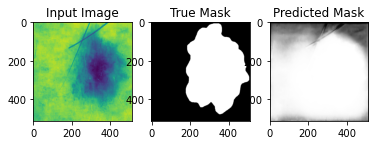

Epoch 35/100
63/63 [==============================] - 25s 401ms/step - loss: 0.2100 - dice_coeff: 0.7736 - val_loss: 2.1454 - val_dice_coeff: 0.4650


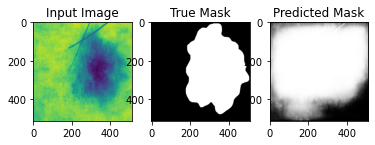

Epoch 36/100
63/63 [==============================] - 25s 402ms/step - loss: 0.2081 - dice_coeff: 0.7720 - val_loss: 1.6074 - val_dice_coeff: 0.4915


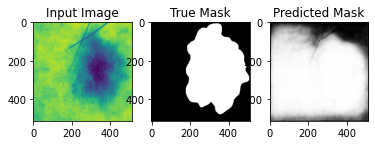

Epoch 37/100
63/63 [==============================] - 25s 402ms/step - loss: 0.2083 - dice_coeff: 0.7718 - val_loss: 1.1315 - val_dice_coeff: 0.6017


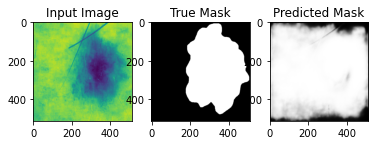

Epoch 38/100
63/63 [==============================] - 25s 400ms/step - loss: 0.2095 - dice_coeff: 0.7706 - val_loss: 2.3886 - val_dice_coeff: 0.4905


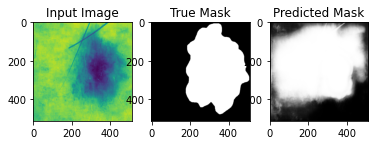

Epoch 39/100
63/63 [==============================] - 25s 401ms/step - loss: 0.2121 - dice_coeff: 0.7640 - val_loss: 1.6761 - val_dice_coeff: 0.4935


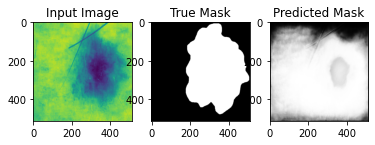

Epoch 40/100
63/63 [==============================] - 25s 403ms/step - loss: 0.2018 - dice_coeff: 0.7802 - val_loss: 2.3302 - val_dice_coeff: 0.4344


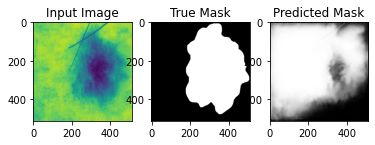

Epoch 41/100
63/63 [==============================] - 25s 401ms/step - loss: 0.2026 - dice_coeff: 0.7833 - val_loss: 1.3031 - val_dice_coeff: 0.4527


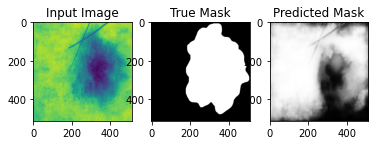

Epoch 42/100
63/63 [==============================] - 25s 401ms/step - loss: 0.2084 - dice_coeff: 0.7716 - val_loss: 0.3504 - val_dice_coeff: 0.7260


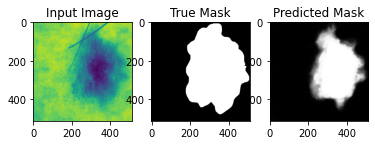

Epoch 43/100
63/63 [==============================] - 25s 403ms/step - loss: 0.1966 - dice_coeff: 0.7802 - val_loss: 1.3941 - val_dice_coeff: 0.5994


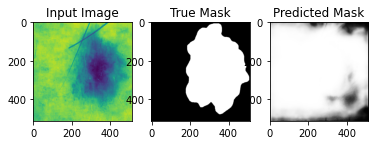

Epoch 44/100
63/63 [==============================] - 25s 401ms/step - loss: 0.1965 - dice_coeff: 0.7864 - val_loss: 1.3604 - val_dice_coeff: 0.5267


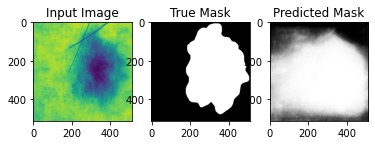

Epoch 45/100
63/63 [==============================] - 25s 403ms/step - loss: 0.1986 - dice_coeff: 0.7785 - val_loss: 2.2185 - val_dice_coeff: 0.4976


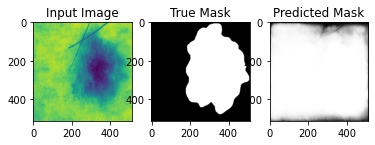

Epoch 46/100
63/63 [==============================] - 25s 402ms/step - loss: 0.1914 - dice_coeff: 0.7884 - val_loss: 1.1071 - val_dice_coeff: 0.5771


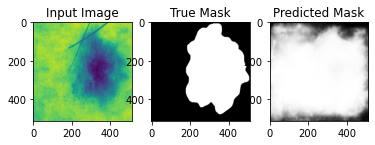

Epoch 47/100
63/63 [==============================] - 25s 400ms/step - loss: 0.1840 - dice_coeff: 0.7963 - val_loss: 0.7569 - val_dice_coeff: 0.6245


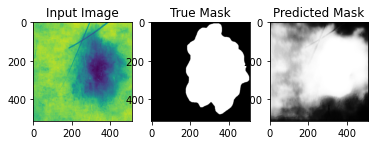

Epoch 48/100
63/63 [==============================] - 25s 401ms/step - loss: 0.1824 - dice_coeff: 0.7994 - val_loss: 0.2699 - val_dice_coeff: 0.7597


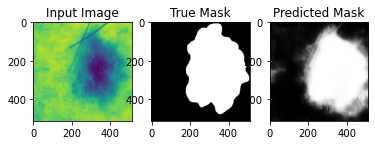

Epoch 49/100
63/63 [==============================] - 25s 402ms/step - loss: 0.1876 - dice_coeff: 0.7931 - val_loss: 0.7745 - val_dice_coeff: 0.5938


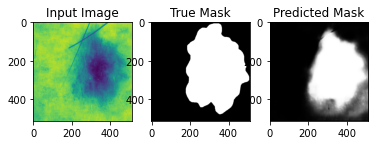

Epoch 50/100
63/63 [==============================] - 25s 400ms/step - loss: 0.1854 - dice_coeff: 0.7959 - val_loss: 0.8320 - val_dice_coeff: 0.6215


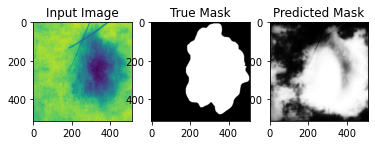

Epoch 51/100
63/63 [==============================] - 25s 401ms/step - loss: 0.1855 - dice_coeff: 0.7937 - val_loss: 0.8580 - val_dice_coeff: 0.6010


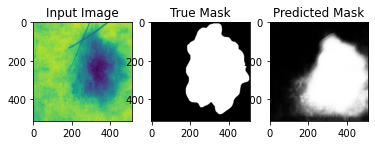

Epoch 52/100
63/63 [==============================] - 25s 402ms/step - loss: 0.1783 - dice_coeff: 0.8034 - val_loss: 0.3006 - val_dice_coeff: 0.7532


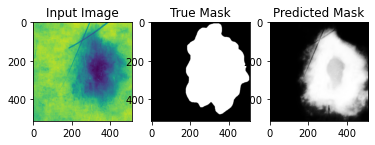

Epoch 53/100
63/63 [==============================] - 25s 400ms/step - loss: 0.1750 - dice_coeff: 0.8045 - val_loss: 0.2789 - val_dice_coeff: 0.7745


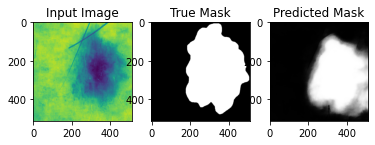

Epoch 54/100
63/63 [==============================] - 25s 401ms/step - loss: 0.1820 - dice_coeff: 0.7952 - val_loss: 0.6837 - val_dice_coeff: 0.6650


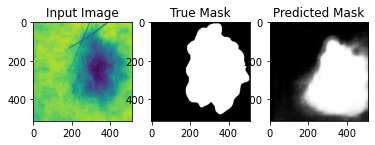

Epoch 55/100
63/63 [==============================] - 25s 402ms/step - loss: 0.1705 - dice_coeff: 0.8095 - val_loss: 0.7603 - val_dice_coeff: 0.6624


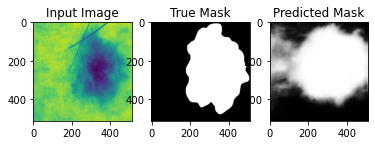

Epoch 56/100
63/63 [==============================] - 25s 402ms/step - loss: 0.1773 - dice_coeff: 0.8031 - val_loss: 4.3945 - val_dice_coeff: 0.4621


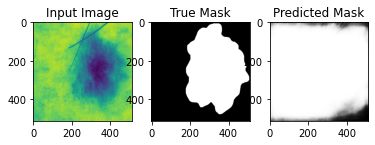

Epoch 57/100
63/63 [==============================] - 25s 402ms/step - loss: 0.1779 - dice_coeff: 0.8036 - val_loss: 2.4452 - val_dice_coeff: 0.4895


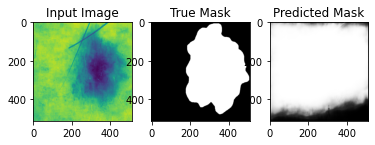

Epoch 58/100
63/63 [==============================] - 25s 401ms/step - loss: 0.1648 - dice_coeff: 0.8160 - val_loss: 1.4917 - val_dice_coeff: 0.5372


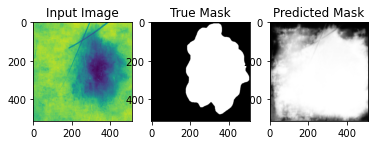

Epoch 59/100
63/63 [==============================] - 25s 401ms/step - loss: 0.1625 - dice_coeff: 0.8228 - val_loss: 0.5147 - val_dice_coeff: 0.6386


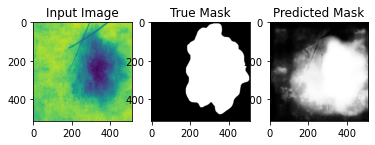

Epoch 60/100
63/63 [==============================] - 25s 401ms/step - loss: 0.1708 - dice_coeff: 0.8100 - val_loss: 0.2743 - val_dice_coeff: 0.7766


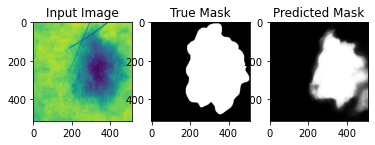

Epoch 61/100
63/63 [==============================] - 25s 402ms/step - loss: 0.1641 - dice_coeff: 0.8195 - val_loss: 0.3009 - val_dice_coeff: 0.7849


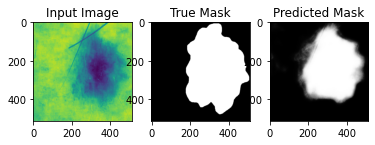

Epoch 62/100
63/63 [==============================] - 25s 402ms/step - loss: 0.1518 - dice_coeff: 0.8294 - val_loss: 0.3693 - val_dice_coeff: 0.7038


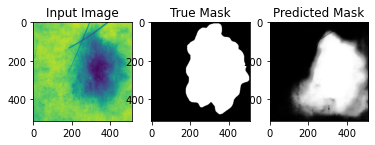

Epoch 63/100
63/63 [==============================] - 25s 401ms/step - loss: 0.1519 - dice_coeff: 0.8284 - val_loss: 0.5767 - val_dice_coeff: 0.6243


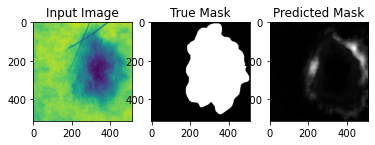

Epoch 64/100
63/63 [==============================] - 25s 402ms/step - loss: 0.1528 - dice_coeff: 0.8297 - val_loss: 0.2929 - val_dice_coeff: 0.7539


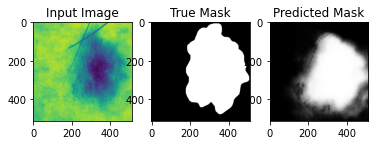

Epoch 65/100
63/63 [==============================] - 25s 402ms/step - loss: 0.1562 - dice_coeff: 0.8242 - val_loss: 0.3052 - val_dice_coeff: 0.7531


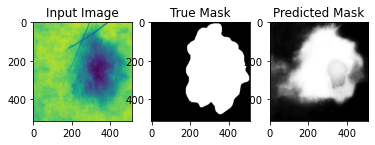

Epoch 66/100
63/63 [==============================] - 25s 401ms/step - loss: 0.1507 - dice_coeff: 0.8344 - val_loss: 0.2942 - val_dice_coeff: 0.7578


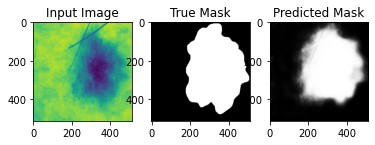

Epoch 67/100
63/63 [==============================] - 25s 401ms/step - loss: 0.1467 - dice_coeff: 0.8353 - val_loss: 2.2537 - val_dice_coeff: 0.4786


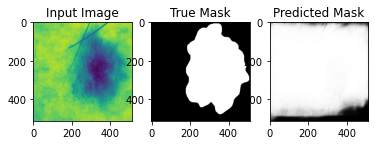

Epoch 68/100
63/63 [==============================] - 25s 402ms/step - loss: 0.1439 - dice_coeff: 0.8404 - val_loss: 1.3266 - val_dice_coeff: 0.5643


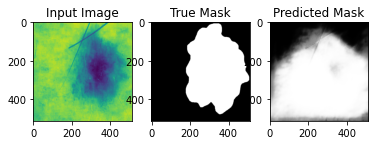

Epoch 69/100
63/63 [==============================] - 25s 400ms/step - loss: 0.1488 - dice_coeff: 0.8349 - val_loss: 1.7572 - val_dice_coeff: 0.4806


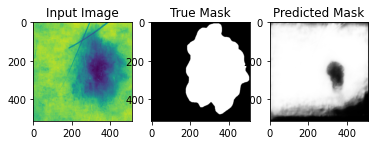

Epoch 70/100
63/63 [==============================] - 25s 402ms/step - loss: 0.1367 - dice_coeff: 0.8442 - val_loss: 1.8443 - val_dice_coeff: 0.4807


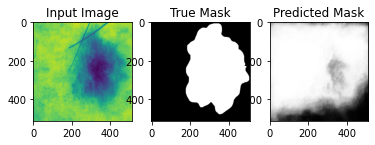

Epoch 71/100
63/63 [==============================] - 25s 403ms/step - loss: 0.1404 - dice_coeff: 0.8432 - val_loss: 0.2908 - val_dice_coeff: 0.7937


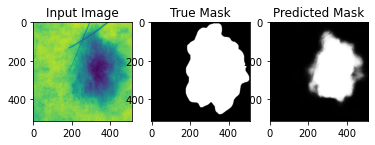

Epoch 72/100
63/63 [==============================] - 25s 401ms/step - loss: 0.1496 - dice_coeff: 0.8355 - val_loss: 1.9918 - val_dice_coeff: 0.5119


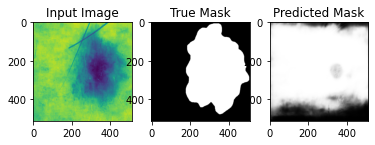

Epoch 73/100
63/63 [==============================] - 25s 401ms/step - loss: 0.1459 - dice_coeff: 0.8370 - val_loss: 0.2971 - val_dice_coeff: 0.7568


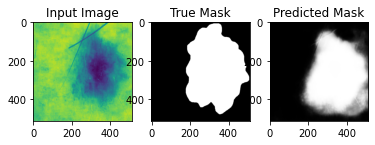

Epoch 74/100
63/63 [==============================] - 25s 402ms/step - loss: 0.1381 - dice_coeff: 0.8474 - val_loss: 0.3506 - val_dice_coeff: 0.7456


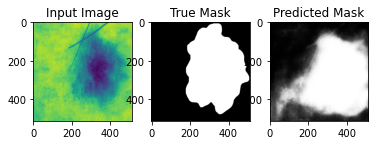

Epoch 75/100
63/63 [==============================] - 25s 401ms/step - loss: 0.1318 - dice_coeff: 0.8521 - val_loss: 2.2108 - val_dice_coeff: 0.5665


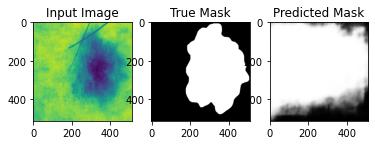

Epoch 76/100
63/63 [==============================] - 25s 402ms/step - loss: 0.1270 - dice_coeff: 0.8552 - val_loss: 2.1623 - val_dice_coeff: 0.5329


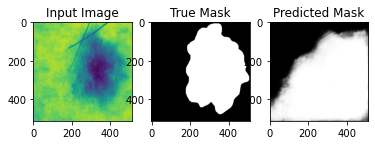

Epoch 77/100
63/63 [==============================] - 25s 401ms/step - loss: 0.1333 - dice_coeff: 0.8552 - val_loss: 3.2845 - val_dice_coeff: 0.4973


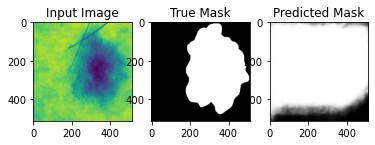

Epoch 78/100
63/63 [==============================] - 25s 402ms/step - loss: 0.1226 - dice_coeff: 0.8611 - val_loss: 0.2584 - val_dice_coeff: 0.7887


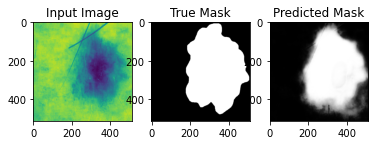

Epoch 79/100
63/63 [==============================] - 25s 400ms/step - loss: 0.1154 - dice_coeff: 0.8715 - val_loss: 0.4808 - val_dice_coeff: 0.6745


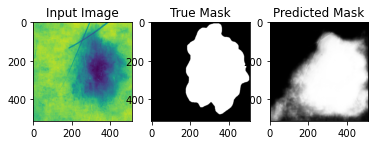

Epoch 80/100
63/63 [==============================] - 25s 403ms/step - loss: 0.1312 - dice_coeff: 0.8535 - val_loss: 1.9236 - val_dice_coeff: 0.5232


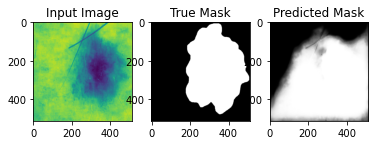

Epoch 81/100
63/63 [==============================] - 25s 401ms/step - loss: 0.1219 - dice_coeff: 0.8635 - val_loss: 1.0575 - val_dice_coeff: 0.5761


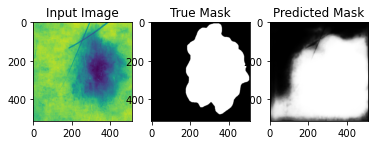

Epoch 82/100
63/63 [==============================] - 25s 401ms/step - loss: 0.1237 - dice_coeff: 0.8594 - val_loss: 2.4609 - val_dice_coeff: 0.4789


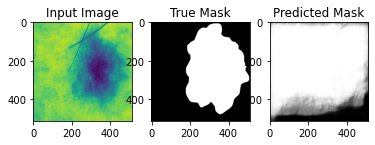

Epoch 83/100
63/63 [==============================] - 25s 402ms/step - loss: 0.1164 - dice_coeff: 0.8702 - val_loss: 0.7720 - val_dice_coeff: 0.6037


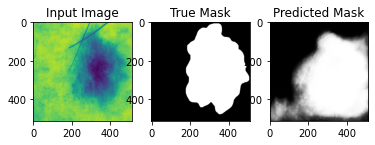

Epoch 84/100
63/63 [==============================] - 25s 401ms/step - loss: 0.1044 - dice_coeff: 0.8819 - val_loss: 1.2110 - val_dice_coeff: 0.5704


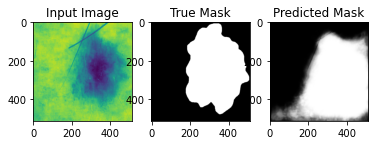

Epoch 85/100
63/63 [==============================] - 25s 402ms/step - loss: 0.0997 - dice_coeff: 0.8880 - val_loss: 0.9095 - val_dice_coeff: 0.5775


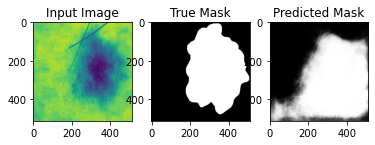

Epoch 86/100
63/63 [==============================] - 25s 402ms/step - loss: 0.0992 - dice_coeff: 0.8901 - val_loss: 1.1917 - val_dice_coeff: 0.5501


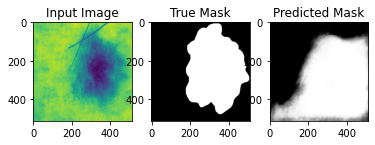

Epoch 87/100
63/63 [==============================] - 25s 400ms/step - loss: 0.1134 - dice_coeff: 0.8736 - val_loss: 0.7345 - val_dice_coeff: 0.6732


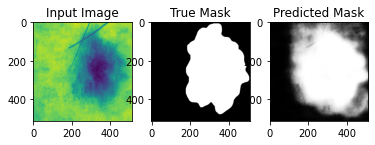

Epoch 88/100
63/63 [==============================] - 25s 402ms/step - loss: 0.1015 - dice_coeff: 0.8854 - val_loss: 3.8032 - val_dice_coeff: 0.5028


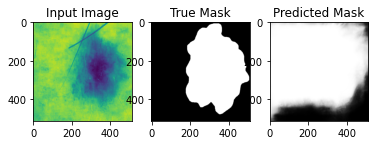

Epoch 89/100
63/63 [==============================] - 25s 402ms/step - loss: 0.0985 - dice_coeff: 0.8905 - val_loss: 2.5308 - val_dice_coeff: 0.5058


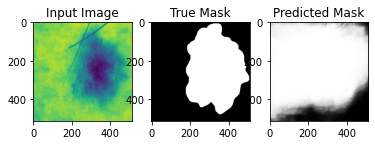

Epoch 90/100
63/63 [==============================] - 25s 401ms/step - loss: 0.0898 - dice_coeff: 0.8999 - val_loss: 1.6416 - val_dice_coeff: 0.5191


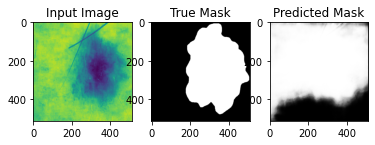

Epoch 91/100
63/63 [==============================] - 25s 401ms/step - loss: 0.0891 - dice_coeff: 0.8980 - val_loss: 0.5521 - val_dice_coeff: 0.6719


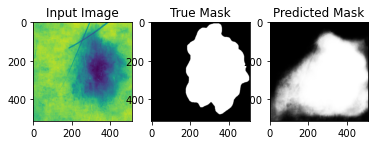

Epoch 92/100
63/63 [==============================] - 25s 403ms/step - loss: 0.1119 - dice_coeff: 0.8758 - val_loss: 0.4011 - val_dice_coeff: 0.7109


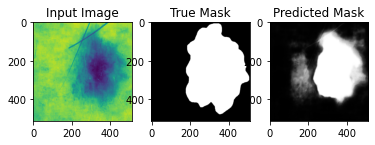

Epoch 93/100
63/63 [==============================] - 25s 401ms/step - loss: 0.1047 - dice_coeff: 0.8830 - val_loss: 0.5398 - val_dice_coeff: 0.7130


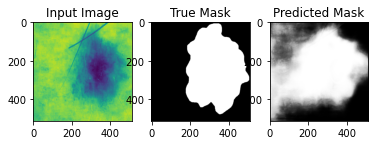

Epoch 94/100
63/63 [==============================] - 25s 402ms/step - loss: 0.0935 - dice_coeff: 0.8939 - val_loss: 4.4227 - val_dice_coeff: 0.4837


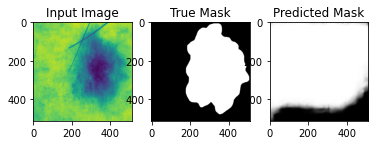

Epoch 95/100
63/63 [==============================] - 25s 402ms/step - loss: 0.0890 - dice_coeff: 0.8992 - val_loss: 0.8517 - val_dice_coeff: 0.6018


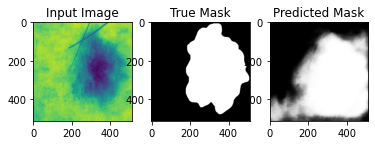

Epoch 96/100
63/63 [==============================] - 25s 401ms/step - loss: 0.0849 - dice_coeff: 0.9042 - val_loss: 0.2654 - val_dice_coeff: 0.8145


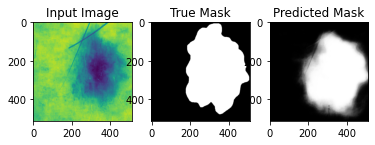

Epoch 97/100
63/63 [==============================] - 25s 402ms/step - loss: 0.0787 - dice_coeff: 0.9107 - val_loss: 0.3978 - val_dice_coeff: 0.7256


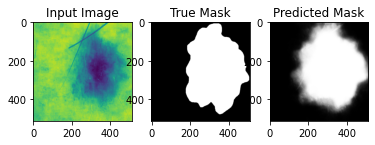

Epoch 98/100
63/63 [==============================] - 25s 402ms/step - loss: 0.0763 - dice_coeff: 0.9123 - val_loss: 0.2103 - val_dice_coeff: 0.8456


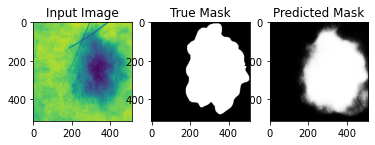

Epoch 99/100
63/63 [==============================] - 25s 400ms/step - loss: 0.0744 - dice_coeff: 0.9153 - val_loss: 0.4688 - val_dice_coeff: 0.7075


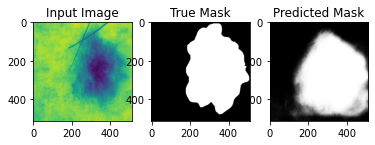

Epoch 100/100
63/63 [==============================] - 25s 402ms/step - loss: 0.0752 - dice_coeff: 0.9157 - val_loss: 1.7202 - val_dice_coeff: 0.5259


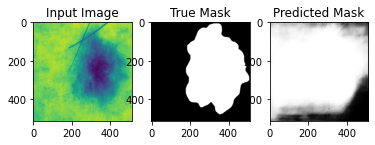

Model saved to: /tmp/kuc_unet2d_9kuc_unet2d_model
History saved to: /tmp/kuc_unet2d_history_7.pkl


In [14]:
hist = C.train(images[0:1000], masks[0:1000], images[1000:1500], masks[1000:1500], batch_size=16, call_backs=vis_callback)

In [19]:
def visualize_predictions(model, images, masks, num_samples=100):
    for i in range(num_samples):
        x_val, y_val = images[i], masks[i]
        y_pred, _ = model.predict(x_val[np.newaxis, ...], y_val[np.newaxis, ...])

        # Draw the input image, true mask, and predicted mask
        fig, ax = plt.subplots(nrows=1, ncols=3)
        
        ax[0].imshow(x_val)
        ax[0].title.set_text('Input Image')

        ax[1].imshow(y_val.squeeze(), cmap='gray')
        ax[1].title.set_text('True Mask')

        ax[2].imshow(y_pred.squeeze(), cmap='gray')
        ax[2].title.set_text('Predicted Mask')

        plt.show()

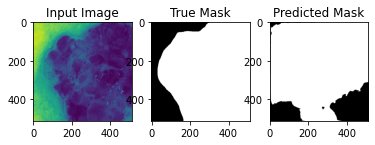

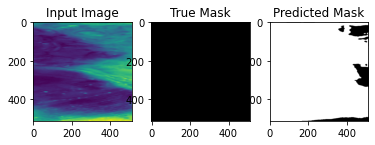

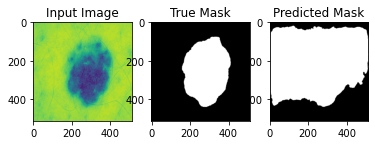

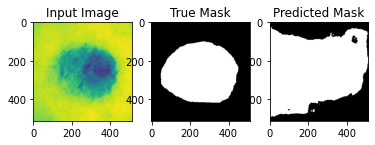

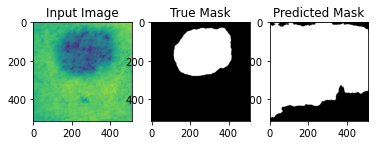

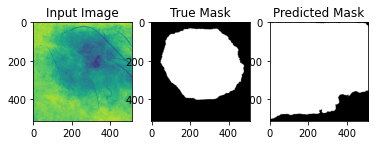

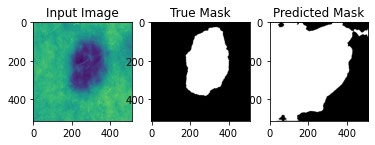

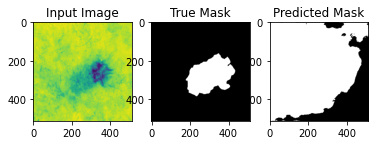

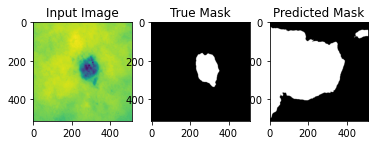

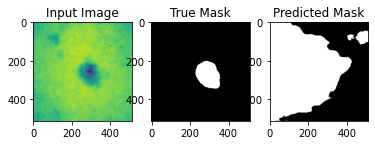

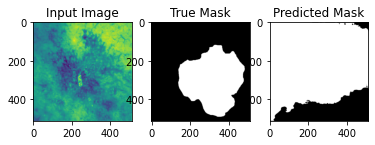

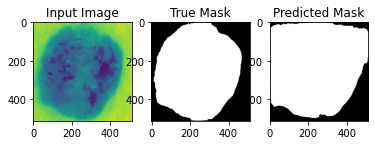

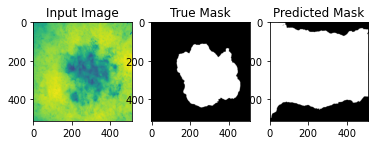

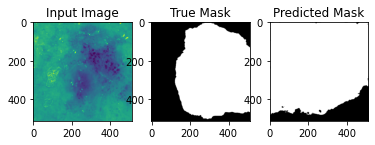

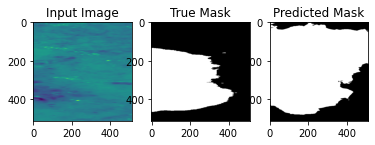

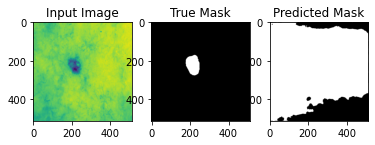

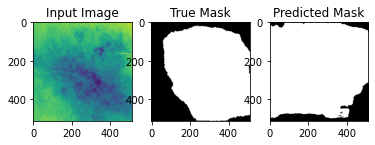

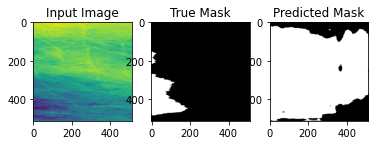

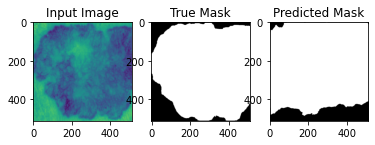

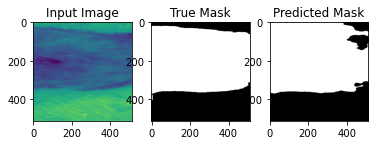

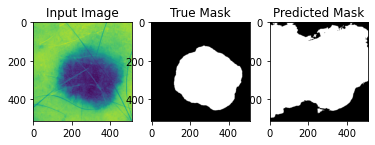

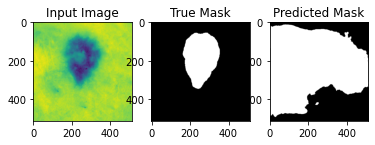

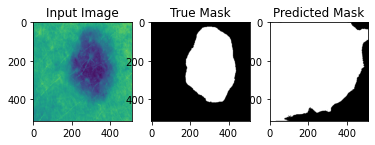

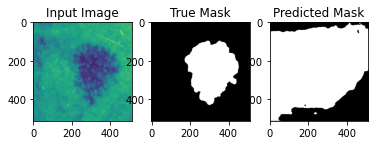

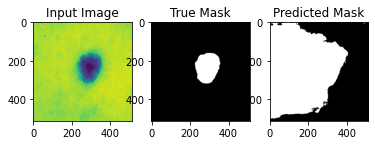

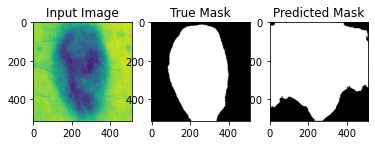

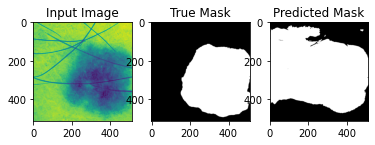

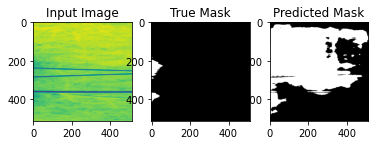

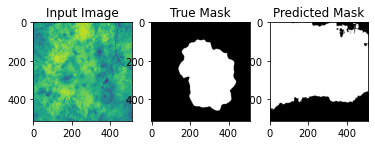

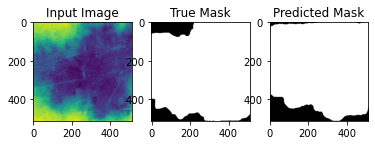

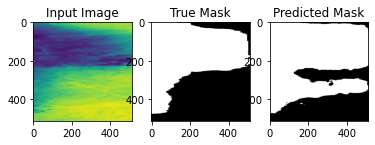

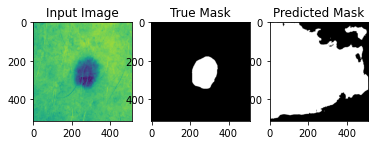

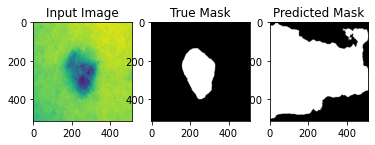

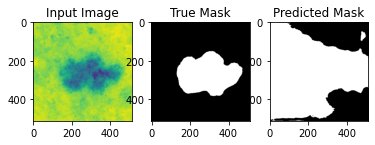

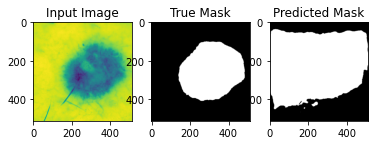

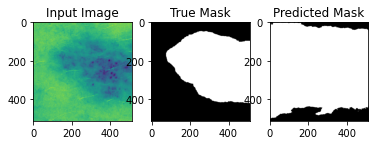

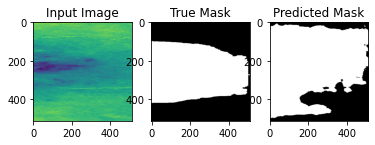

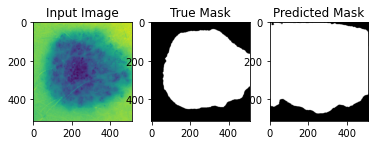

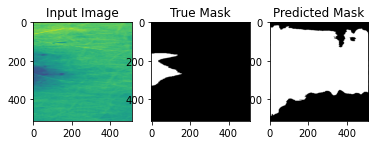

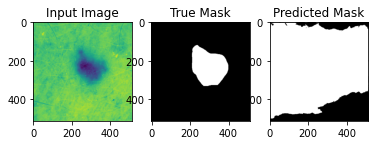

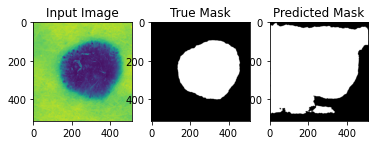

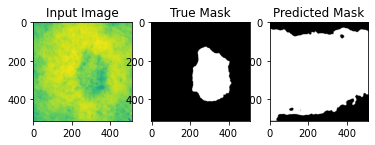

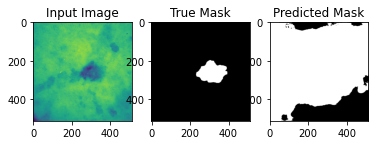

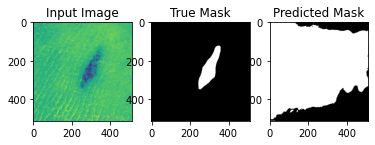

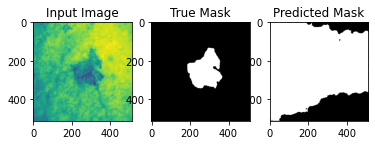

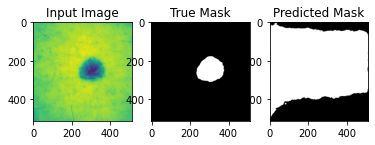

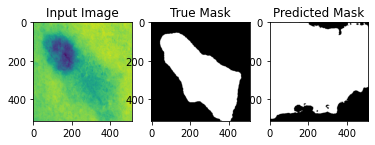

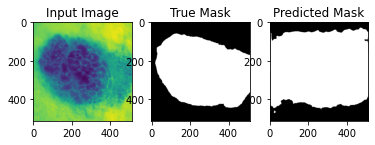

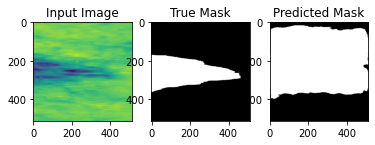

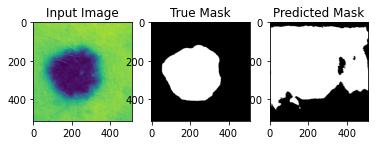

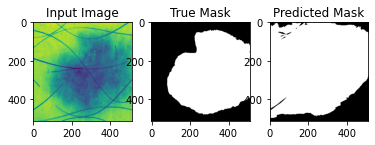

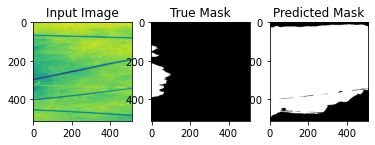

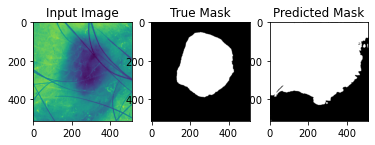

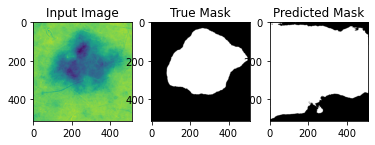

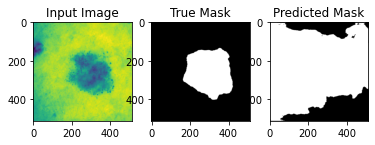

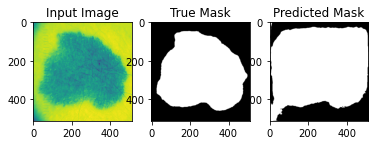

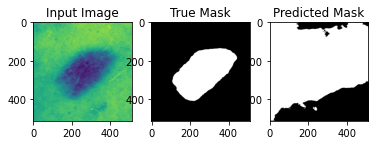

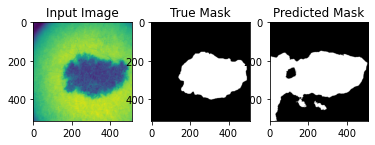

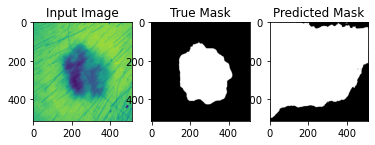

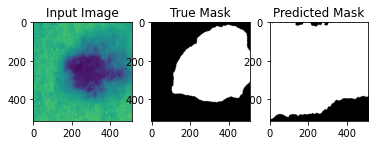

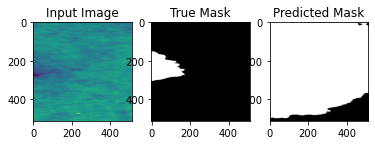

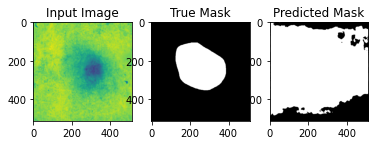

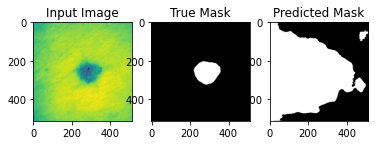

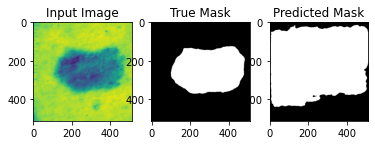

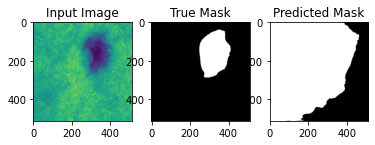

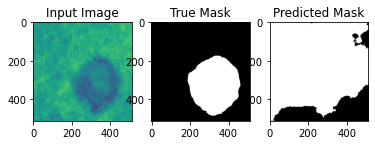

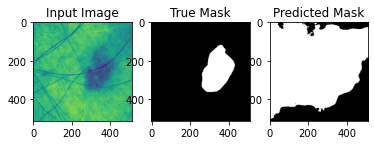

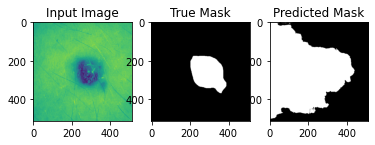

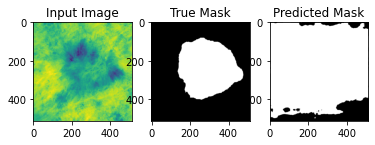

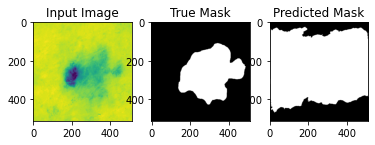

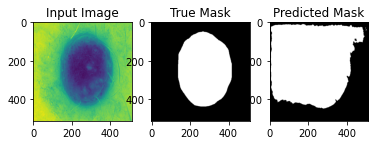

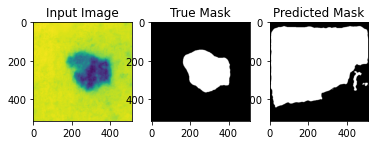

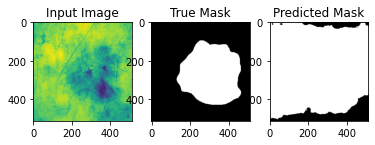

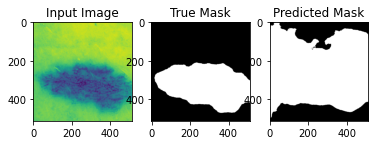

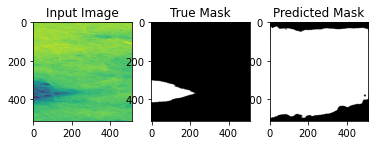

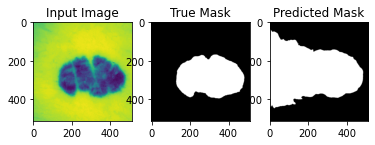

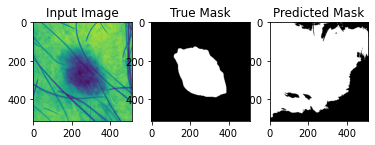

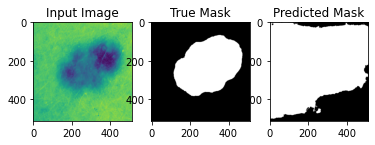

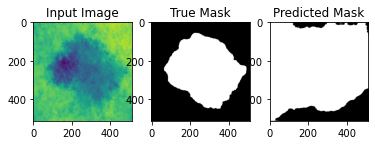

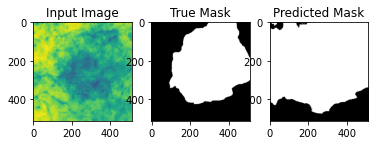

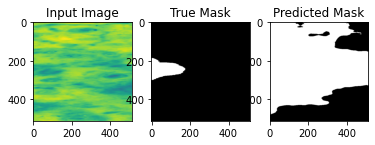

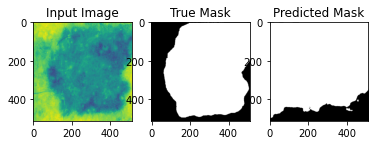

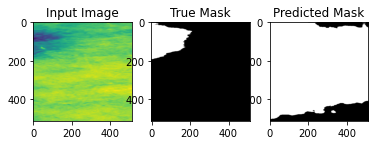

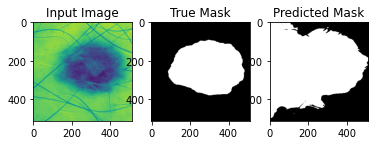

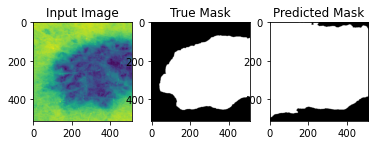

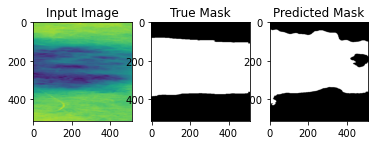

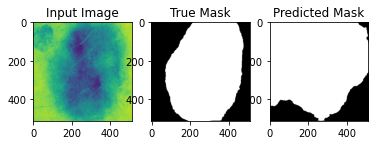

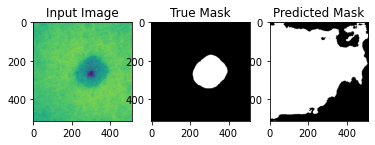

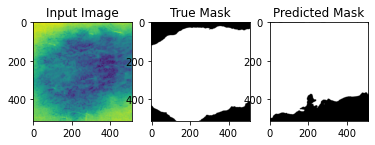

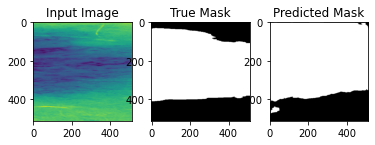

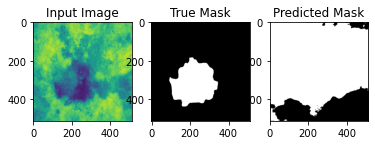

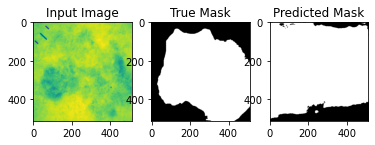

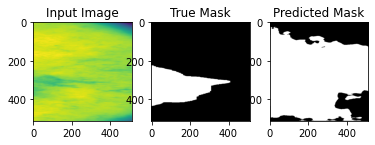

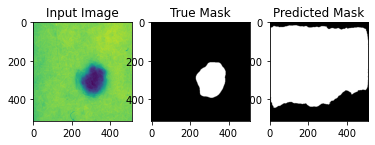

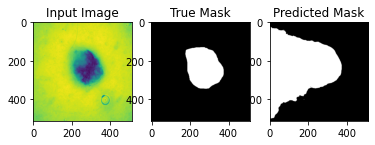

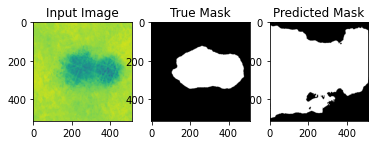

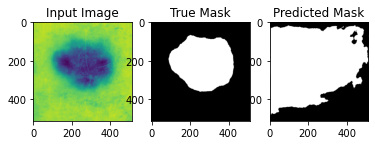

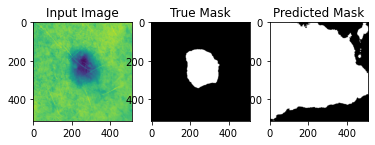

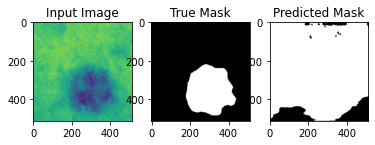

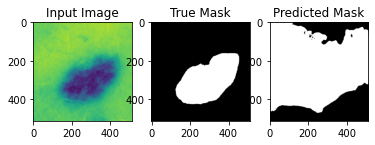

In [20]:
# replace "trained_model" with your trained model variable, and "images" and "masks" with your validation images and masks
visualize_predictions(C, images[1000:1500], masks[1000:1500])
